<div style="background: linear-gradient(135deg, #7c2d12 0%, #c2410c 50%, #fb923c 100%);
            padding: 30px;
            border-radius: 15px;
            box-shadow: 0 8px 20px rgba(124, 45, 18, 0.3);
            margin: 20px 0;">
    <h1 style="color: white;
               text-align: center;
               margin: 0;
               font-size: 2.5em;
               font-weight: bold;
               text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
        Projet Final de Mathématiques Appliquées à la Data Science
    </h1>
</div>

<h1 style="color: #075985;
               margin: 0;
               font-size: 2em;
               font-weight: bold;
               text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
        Phase 1 : Configuration - chargement et nettoyage des données
</h1>

In [33]:
# Imports scientifiques essentiels
import numpy as np                  
import pandas as pd                
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns              

# Statistiques et machine learning
import statsmodels.api as sm  # Pour les p-values et stats détaillées
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Lecture/écriture de fichiers
from IPython.display import display, HTML

# Pour ignorer les avertissements
import warnings
warnings.filterwarnings('ignore')

# Configuration de l'affichage
%matplotlib inline
pd.set_option('display.max_columns', None)

<div style="background-color: #075985;
            padding: 15px 25px;
            border-left: 6px solid #0ea5e9;
            border-radius: 8px;
            margin: 15px 0;">
    <h2 style="color: #fff3e0;
               margin: 0;
               font-size: 1.1em;;
               font-weight: bold;">
         1. Inspection Initiale
    </h2>
</div>

In [34]:
# Chargement du dataset
try:
    devoir = pd.read_csv('vehicles.csv')
    print(f"Dimensions initiales : {devoir.shape[0]} lignes, {devoir.shape[1]} colonnes")
except FileNotFoundError:
    print("Erreur : Le fichier 'vehicles.csv' n'a pas été trouvé.")

Dimensions initiales : 426880 lignes, 26 colonnes


In [35]:
#Informations générales sur le dataset
devoir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [36]:
#Aperçu des premières lignes
devoir.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [37]:
#Statistiques descriptives
devoir.describe(include='all')

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
count,4.268800e+05,426880,426880,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,423867,4.224800e+05,418638,424324,265838,296313,120519,334022,296677,426812,426810,0.0,426880,420331.000000,420331.000000,426812
unique,NaN,426880,404,413,NaN,NaN,42,29667,6,8,5,NaN,6,3,118264,3,4,13,12,241899,360911,NaN,51,NaN,NaN,381536
top,NaN,https://prescott.craigslist.org/cto/d/prescott...,columbus,https://spokane.craigslist.org,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,NaN,ca,NaN,NaN,2021-04-23T22:13:05-0400
freq,NaN,1,3608,2988,NaN,NaN,70985,8009,121456,94169,356209,NaN,405117,336524,261,131904,63465,87056,79285,7357,231,NaN,50614,NaN,NaN,12
mean,7.311487e+09,NaN,NaN,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,NaN,9.804333e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.493940,-94.748599,NaN
std,4.473170e+06,NaN,NaN,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,NaN,2.138815e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.841533,18.365462,NaN
min,7.207408e+09,NaN,NaN,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.122245,-159.827728,NaN
25%,7.308143e+09,NaN,NaN,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,3.770400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.601900,-111.939847,NaN
50%,7.312621e+09,NaN,NaN,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,8.554800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.150100,-88.432600,NaN
75%,7.315254e+09,NaN,NaN,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,NaN,1.335425e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.398900,-80.832039,NaN


<div style="background-color: #075985;
            padding: 15px 25px;
            border-left: 6px solid #0ea5e9;
            border-radius: 8px;
            margin: 15px 0;">
    <h2 style="color: #fff3e0;
               margin: 0;
               font-size: 1.1em;;
               font-weight: bold;">
        2. Suppression des colonnes inutiles et trop vides.
    </h2>
</div>

In [38]:
# Calcul des pourcentages de valeurs nulles
null_percentages = devoir.isnull().mean() * 100

# Affichage trié du plus grand au plus petit
print(null_percentages.sort_values(ascending=False))

county          100.000000
size             71.767476
cylinders        41.622470
condition        40.785232
VIN              37.725356
drive            30.586347
paint_color      30.501078
type             21.752717
manufacturer      4.133714
title_status      1.930753
lat               1.534155
long              1.534155
model             1.236179
odometer          1.030735
fuel              0.705819
transmission      0.598763
year              0.282281
description       0.016398
posting_date      0.015930
image_url         0.015930
region_url        0.000000
url               0.000000
id                0.000000
region            0.000000
price             0.000000
state             0.000000
dtype: float64


In [39]:
# Colonnes à supprimer
cols_to_drop = [
    # Identifiants et URLs non pertinents pour l'analyse
    'id', 'url', 'region_url', 'VIN', 'image_url',
    # Textuelles longues et peu structurées
    'description', 'region', 'county', 'state', 'lat', 'long', 'posting_date',
    # Suppression des colonnes ayant >40% de valeur nulle
    'size', 'cylinders', 'condition', 'paint_color',
    #Trop de modèles différents pour une régression simple
    'model'
]
# Suppression
df_clean = devoir.drop(columns=cols_to_drop, errors='ignore')

# Calcul des pourcentages de valeurs nulles
null_percentages = (df_clean.isnull().sum() / len(df_clean)) * 100

# Affichage propre et trié
print(null_percentages.sort_values(ascending=False))
print("Colonnes supprimées :", cols_to_drop)
print("Nouveau shape du dataset :", df_clean.shape)


drive           30.586347
type            21.752717
manufacturer     4.133714
title_status     1.930753
odometer         1.030735
fuel             0.705819
transmission     0.598763
year             0.282281
price            0.000000
dtype: float64
Colonnes supprimées : ['id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'region', 'county', 'state', 'lat', 'long', 'posting_date', 'size', 'cylinders', 'condition', 'paint_color', 'model']
Nouveau shape du dataset : (426880, 9)


<div style="background-color: #075985;
            padding: 15px 25px;
            border-left: 6px solid #0ea5e9;
            border-radius: 8px;
            margin: 15px 0;">
    <h2 style="color: #fff3e0;
               margin: 0;
               font-size: 1.1em;;
               font-weight: bold;">
        3. Gestion des doublons.
    </h2>
</div>

In [40]:
# Suppression des doublons stricts
n_bef = df_clean.shape[0]
df_clean.drop_duplicates(inplace=True)
n_dedup = n_bef - df_clean.shape[0]

print(f"[Doublons] {n_dedup} doublons stricts supprimés.")
print("(Lignes ayant exactement les mêmes infos techniques et prix).")

[Doublons] 184052 doublons stricts supprimés.
(Lignes ayant exactement les mêmes infos techniques et prix).


In [41]:
# Vérification des doublons après suppression
df_clean.duplicated().sum()

np.int64(0)

In [42]:
# Vérification des valeurs nulles après suppression des doublons
df_clean.isnull().sum().sum()

np.int64(150402)

<div style="background-color: #075985;
            padding: 15px 25px;
            border-left: 6px solid #0ea5e9;
            border-radius: 8px;
            margin: 15px 0;">
    <h2 style="color: #fff3e0;
               margin: 0;
               font-size: 1.1em;;
               font-weight: bold;">
        4. Traitement des valeurs aberrantes.
    </h2>
</div>

In [43]:
# Détection des outliers avec la méthode IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"\n--- {column} - Méthode IQR ---")
    print(f"Q1 = {Q1:,.0f} | Q3 = {Q3:,.0f} | IQR = {IQR:,.0f}")
    print(f"Bornes : [{lower_bound:,.0f} ; {upper_bound:,.0f}]")
    print(f"Nombre d'outliers détectés : {len(outliers)}")
    return outliers.index

# Application
outliers_price_iqr = detect_outliers_iqr(df_clean, 'price')
outliers_year_iqr  = detect_outliers_iqr(df_clean, 'year')
outliers_odo_iqr   = detect_outliers_iqr(df_clean, 'odometer')


--- price - Méthode IQR ---
Q1 = 4,900 | Q3 = 19,897 | IQR = 14,997
Bornes : [-17,596 ; 42,392]
Nombre d'outliers détectés : 10610

--- year - Méthode IQR ---
Q1 = 2,006 | Q3 = 2,016 | IQR = 10
Bornes : [1,991 ; 2,031]
Nombre d'outliers détectés : 11256

--- odometer - Méthode IQR ---
Q1 = 52,126 | Q3 = 145,678 | IQR = 93,552
Bornes : [-88,202 ; 286,005]
Nombre d'outliers détectés : 3080


In [44]:
# Filtrage basé sur des seuils raisonnables pour le marché des véhicules d'occasion
# (Plutôt que de supprimer selon IQR, on fixe des limites logiques)
n_initial = df_clean.shape[0]
condition_price = (df_clean['price'] > 500) & (df_clean['price'] < 100000)
condition_year = (df_clean['year'] > 1990) & (df_clean['year'] < 2025)
condition_km = (df_clean['odometer'] > 1000) & (df_clean['odometer'] < 300000)

df_clean = df_clean[condition_price & condition_year & condition_km].copy()

n_final = df_clean.shape[0]
print(f"[Filtre Outliers] Reste {n_final} lignes ({(n_final/n_initial)*100:.1f}% du total).")

[Filtre Outliers] Reste 201934 lignes (83.2% du total).


<div style="background-color: #075985;
            padding: 15px 25px;
            border-left: 6px solid #0ea5e9;
            border-radius: 8px;
            margin: 15px 0;">
    <h2 style="color: #fff3e0;
               margin: 0;
               font-size: 1.1em;;
               font-weight: bold;">
       5. Imputation (gestion des valeurs manquantes) et Feature engineering    (création de variables).
    </h2>
</div>

In [45]:
# Imputation simple : Médiane pour les numériques, 'unknown' pour les catégorielles
df_clean['odometer'] = df_clean['odometer'].fillna(df_clean['odometer'].median())
df_clean['year'] = df_clean['year'].fillna(df_clean['year'].median())

categorical_cols = ['manufacturer', 'fuel', 'transmission', 'drive', 'type', 'title_status']
for col in categorical_cols:
    df_clean[col] = df_clean[col].fillna('unknown')

# Simplification de la marque (Manufacturer) Garder le TOP 20
top_20_brands = df_clean['manufacturer'].value_counts().nlargest(20).index
df_clean['manufacturer'] = df_clean['manufacturer'].apply(lambda x: x if x in top_20_brands else 'Other')

# Feature Engineering : Création de la variable 'car_age'
df_clean['car_age'] = 2025 - df_clean['year']
df_clean.drop(columns=['year'], inplace=True)

print("\n DATASET PRÊT. Aperçu :")
display(df_clean.head())


 DATASET PRÊT. Aperçu :


,price,manufacturer,fuel,odometer,title_status,transmission,drive,type,car_age
27,33590,gmc,gas,57923.0,clean,other,unknown,pickup,11.0
28,22590,chevrolet,gas,71229.0,clean,other,unknown,pickup,15.0
29,39590,chevrolet,gas,19160.0,clean,other,unknown,pickup,5.0
30,30990,toyota,gas,41124.0,clean,other,unknown,pickup,8.0
31,15000,ford,gas,128000.0,clean,automatic,rwd,truck,12.0


In [46]:
# Vérification des valeurs nulles après nettoyage
df_clean.isnull().sum().sum()

np.int64(0)

In [47]:
# Vérification des doublons après nettoyage
df_clean.duplicated().sum()

np.int64(10)

<h1 style="color: #075985;
               margin: 0;
               font-size: 2em;
               font-weight: bold;
               text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
        Phase 2 : Visualisation & analyse des données
</h1>

<div style="background-color: #075985;
            padding: 15px 25px;
            border-left: 6px solid #0ea5e9;
            border-radius: 8px;
            margin: 15px 0;">
    <h2 style="color: #fff3e0;
               margin: 0;
               font-size: 1.1em;;
               font-weight: bold;">
         1. Configuration du style graphique
    </h2>
</div>

In [48]:
sns.set_style("whitegrid") # Fond blanc avec grille légère pour la lisibilité
plt.rcParams['font.family'] = 'sans-serif' # Police moderne
plt.rcParams['figure.figsize'] = (10, 6)    # Taille par défaut

# Histogrammes (Gris foncés à clairs)
colors_hist = ["#1a202c", "#2d3748", "#4a5568", "#718096", "#a0aec0"]

# Scatters (Oranges & Bleus)
colors_scatter1 = ["#7c2d12", "#9a3412", "#c2410c", "#ea580c", "#fb923c"]
colors_scatter2 = ["#0c4a6e", "#075985", "#0284c7", "#0ea5e9", "#38bdf8"]

# Boxplots (Verts/Rouges & Violets/Cyans)
colors_box1 = ["#065f46", "#059669", "#6b7280", "#dc2626", "#991b1b"]
colors_box2 = ["#5b21b6", "#7c3aed", "#0891b2", "#06b6d4", "#22d3ee"]

# Heatmap (Bleu vers Rouge via Orange)
colors_heatmap = ["#1e3a8a", "#4f46e5", "#f59e0b", "#f97316", "#dc2626"]
cmap_corr = LinearSegmentedColormap.from_list("CustomHeatmap", colors_heatmap)


print("Palettes chargées")

Palettes chargées


<div style="background-color: #075985;
            padding: 15px 25px;
            border-left: 6px solid #0ea5e9;
            border-radius: 8px;
            margin: 15px 0;">
    <h2 style="color: #fff3e0;
               margin: 0;
               font-size: 1.1em;;
               font-weight: bold;">
         2. Création des graphiques
    </h2>
</div>

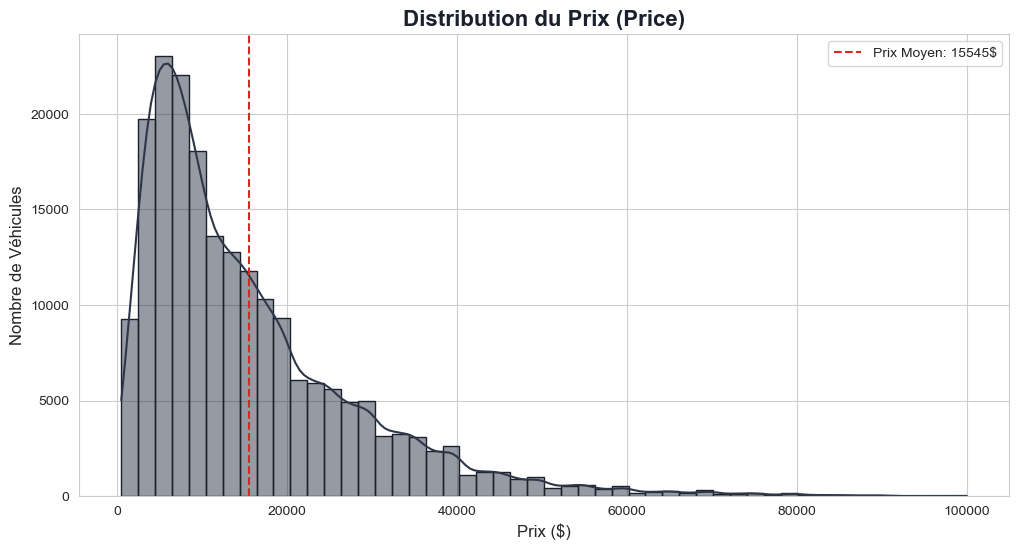

In [49]:
# GRAPHIQUE 1 : DISTRIBUTION DU PRIX (HISTOGRAMME)

plt.figure(figsize=(12, 6))
sns.histplot(df_clean['price'], bins=50, color=colors_hist[1], kde=True, edgecolor=colors_hist[0])
plt.title("Distribution du Prix (Price)", fontsize=16, fontweight='bold', color=colors_hist[0])
plt.xlabel("Prix ($)", fontsize=12)
plt.ylabel("Nombre de Véhicules", fontsize=12)
plt.axvline(df_clean['price'].mean(), color=colors_box1[3], linestyle='--', label=f'Prix Moyen: {df_clean["price"].mean():.0f}$')
plt.legend()
plt.savefig("graph1_distribution_price.png", dpi=300, bbox_inches='tight')
plt.show()


La distribution est asymétrique à droite (skewed), typique des données monétaires.

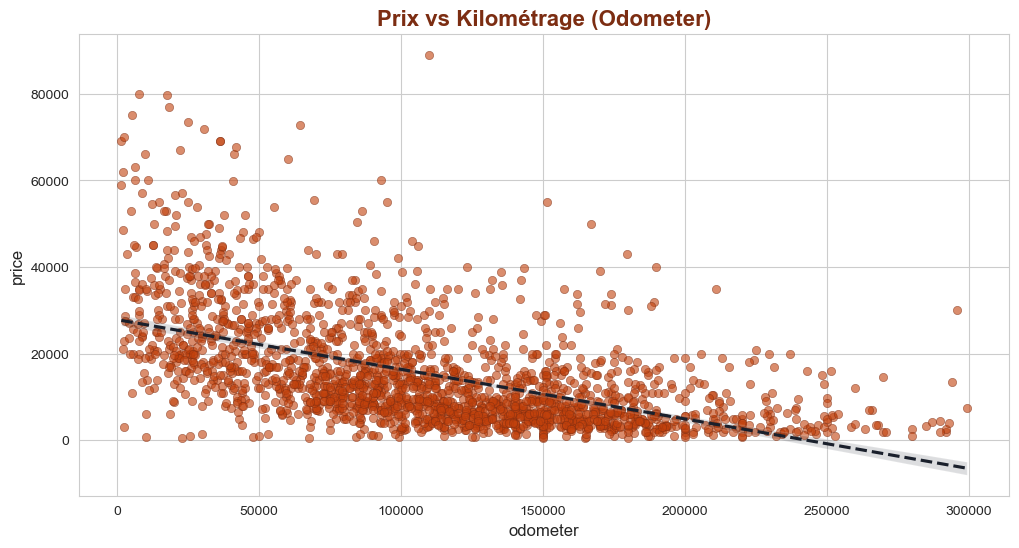

In [50]:
# GRAPHIQUE 2 : PRIX vs KILOMÉTRAGE (SCATTER PLOT)

plt.figure(figsize=(12, 6))
# Échantillonnage pour lisibilité
sns.scatterplot(data=df_clean.sample(2000, random_state=42), x='odometer', y='price',
                color=colors_scatter1[2], alpha=0.6, edgecolor=colors_scatter1[0])
plt.title("Prix vs Kilométrage (Odometer)", fontsize=16, fontweight='bold', color=colors_scatter1[0])
plt.xlabel("Kilométrage (Miles)", fontsize=12)
plt.ylabel("Prix ($)", fontsize=12)
# Ajout d'une ligne de tendance simple
sns.regplot(data=df_clean.sample(2000, random_state=42), x='odometer', y='price',
            scatter=False, color=colors_hist[0], line_kws={"linestyle": "--"})
plt.savefig("graph2_price_vs_odometer.png", dpi=300, bbox_inches='tight')
plt.show()


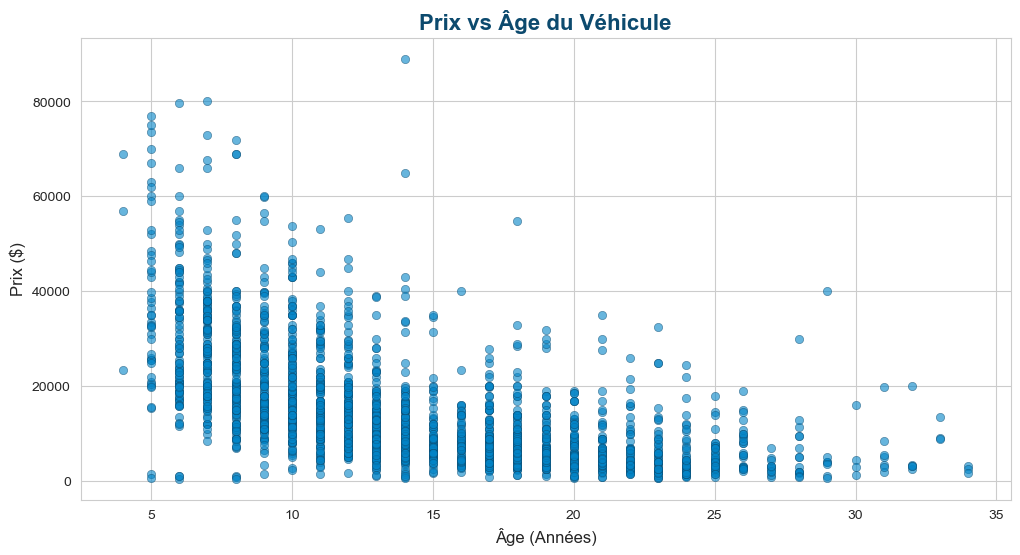

In [51]:
# GRAPHIQUE 3 : PRIX vs ÂGE (SCATTER PLOT)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_clean.sample(2000, random_state=42), x='car_age', y='price',
                color=colors_scatter2[2], alpha=0.6, edgecolor=colors_scatter2[0])
plt.title("Prix vs Âge du Véhicule", fontsize=16, fontweight='bold', color=colors_scatter2[0])
plt.xlabel("Âge (Années)", fontsize=12)
plt.ylabel("Prix ($)", fontsize=12)
plt.savefig("graph3_price_vs_age.png", dpi=300, bbox_inches='tight')
plt.show()


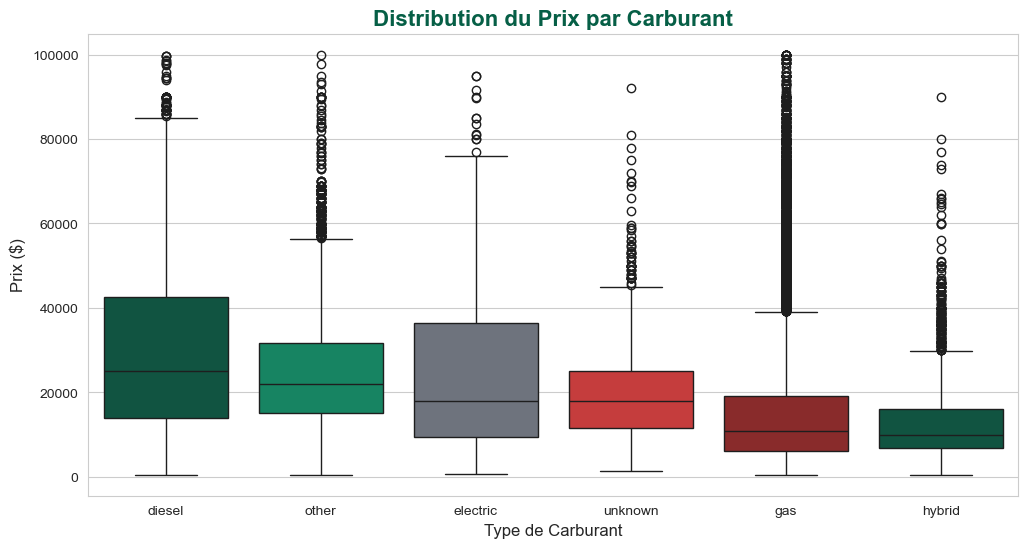

In [52]:
# GRAPHIQUE 4 : PRIX SELON LE CARBURANT (BOXPLOT)

plt.figure(figsize=(12, 6))
# On trie pour avoir un ordre logique
order_fuel = df_clean.groupby('fuel')['price'].median().sort_values(ascending=False).index
sns.boxplot(data=df_clean, x='fuel', y='price', order=order_fuel, palette=colors_box1)
plt.title("Distribution du Prix par Carburant", fontsize=16, fontweight='bold', color=colors_box1[0])
plt.xlabel("Type de Carburant", fontsize=12)
plt.ylabel("Prix ($)", fontsize=12)
plt.savefig("graph4_boxplot_fuel.png", dpi=300, bbox_inches='tight')
plt.show()


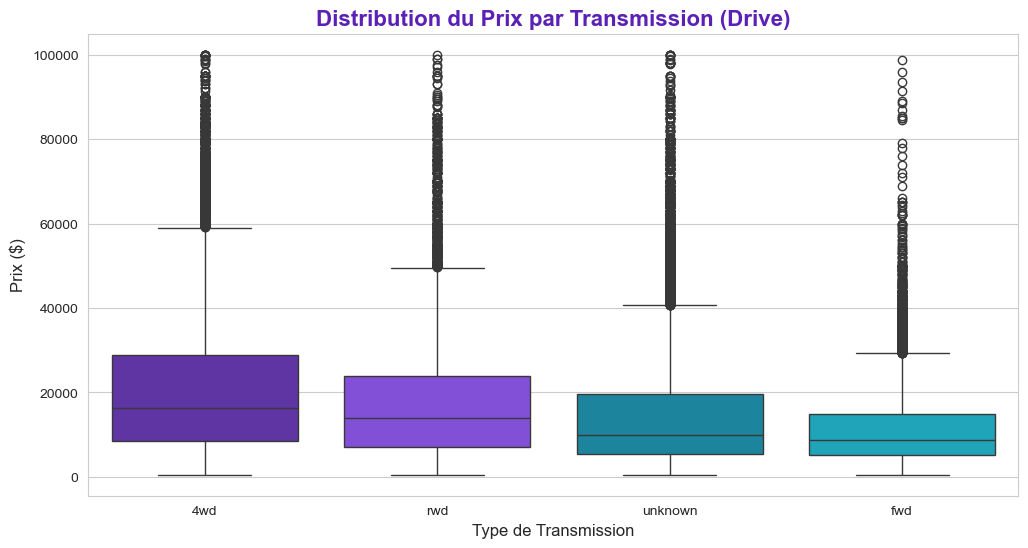

In [53]:
# GRAPHIQUE 5 : PRIX SELON LA TRANSMISSION (BOXPLOT)

plt.figure(figsize=(12, 6))
order_drive = df_clean.groupby('drive')['price'].median().sort_values(ascending=False).index
sns.boxplot(data=df_clean, x='drive', y='price', order=order_drive, palette=colors_box2)
plt.title("Distribution du Prix par Transmission (Drive)", fontsize=16, fontweight='bold', color=colors_box2[0])
plt.xlabel("Type de Transmission", fontsize=12)
plt.ylabel("Prix ($)", fontsize=12)
plt.savefig("graph5_boxplot_drive.png", dpi=300, bbox_inches='tight')
plt.show()


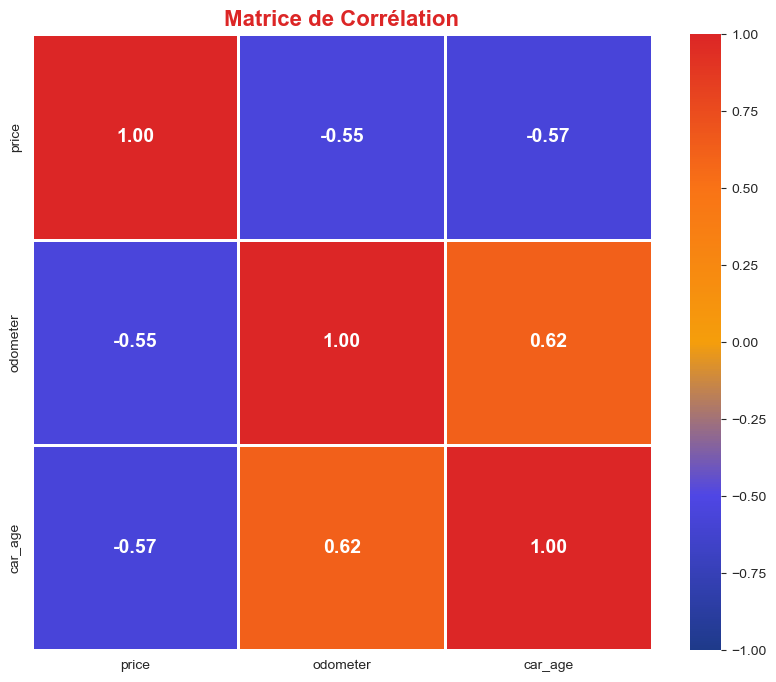

Tous les graphiques ont été générés et sauvegardés en PNG.


In [54]:
# GRAPHIQUE 6 : MATRICE DE CORRÉLATION (HEATMAP)

plt.figure(figsize=(10, 8))
# Calcul de la corrélation
corr_matrix = df_clean[['price', 'odometer', 'car_age']].corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap_corr, vmin=-1, vmax=1,
            linewidths=1, linecolor='white', annot_kws={"size": 14, "weight": "bold"})
plt.title("Matrice de Corrélation", fontsize=16, fontweight='bold', color=colors_heatmap[-1])
plt.savefig("graph6_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

print("Tous les graphiques ont été générés et sauvegardés en PNG.")

<h1 style="color: #075985;
               margin: 0;
               font-size: 2em;
               font-weight: bold;
               text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
        Phase 3 : Modélisation - Régression Linéaire
</h1>

<div style="background-color: #075985;
            padding: 15px 25px;
            border-left: 6px solid #0ea5e9;
            border-radius: 8px;
            margin: 15px 0;">
    <h2 style="color: #fff3e0;
               margin: 0;
               font-size: 1.1em;;
               font-weight: bold;">
         1. Préparation des données pour la régression
    </h2>

In [55]:
# --- Couleurs personnalisées (Cohérence graphique) ---
colors_resid = ["#1a202c", "#2d3748", "#4a5568", "#718096", "#a0aec0"]
colors_pred = ["#0c4a6e", "#075985", "#0284c7", "#0ea5e9", "#38bdf8"]

print("[Préparation] Encodage et séparation des données...")

# Encodage des variables catégorielles avec get_dummies
X = pd.get_dummies(df_clean.drop(columns=['price']), drop_first=True)
y = df_clean['price']

# Conversion en int pour éviter les problèmes de type
X = X.astype(int)

# [x] Split Train/Test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Données prêtes : {X_train.shape[0]} lignes d'entraînement, {X_test.shape[0]} de test.")
print(f"Nombre de variables explicatives (features) : {X.shape[1]}")

[Préparation] Encodage et séparation des données...
Données prêtes : 161547 lignes d'entraînement, 40387 de test.
Nombre de variables explicatives (features) : 52


<div style="background-color: #075985;
            padding: 15px 25px;
            border-left: 6px solid #0ea5e9;
            border-radius: 8px;
            margin: 15px 0;">
    <h2 style="color: #fff3e0;
               margin: 0;
               font-size: 1.1em;;
               font-weight: bold;">
         2. Entraînement du modèle de régression linéaire
    </h2>
</div>

In [56]:
# Entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

print("Modèle entraîné avec succès.")


Modèle entraîné avec succès.


<div style="background-color: #075985;
            padding: 15px 25px;
            border-left: 6px solid #0ea5e9;
            border-radius: 8px;
            margin: 15px 0;">
    <h2 style="color: #fff3e0;
               margin: 0;
               font-size: 1.1em;;
               font-weight: bold;">
         3. Analyse des résultats du modèle
    </h2>
</div>

In [57]:
# Pour obtenir les p-values, on utilise statsmodels
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
# Encodage des variables catégorielles avec get_dummies
X = pd.get_dummies(df_clean.drop(columns=['price']), drop_first=True)
y = df_clean['price']

# Ensure numeric dtypes for sklearn / statsmodels
# Convert to numeric, coerce non\-convertible values to NaN, fill NaNs, and use float dtype
X = X.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
# Affichage complet des statistiques
print(model_sm.summary())

# Extraction propre des P-values significatives (< 0.05)
p_values = model_sm.pvalues
significant_vars = p_values[p_values < 0.05].index.tolist()

print(f"\n Variables significatives (p < 0.05) : {len(significant_vars)} sur {len(p_values)} totales.")


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     5182.
Date:                Tue, 02 Dec 2025   Prob (F-statistic):               0.00
Time:                        09:11:36   Log-Likelihood:            -1.6800e+06
No. Observations:              161547   AIC:                         3.360e+06
Df Residuals:                  161494   BIC:                         3.361e+06
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [58]:
r2_initial = model_sm.rsquared
print(f"R² du modèle initial : {r2_initial}")

# Fonction pour itération (supprime jusqu'à 4 features non significatives)
def iterative_elimination(X, y, significance_level=0.05, max_iterations=4):
    X = sm.add_constant(X)
    iterations = 0
    removed_features = []
    while iterations < max_iterations:
        model = sm.OLS(y, X).fit()
        p_values = model.pvalues
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            feature_to_remove = p_values.idxmax()
            if feature_to_remove == 'const':
                break
            X = X.drop(columns=[feature_to_remove])
            removed_features.append(feature_to_remove)
            print(f"Itération {iterations+1}: Supprimée '{feature_to_remove}' (p-value: {max_p_value})")
            iterations += 1
        else:
            print("Toutes les features restantes sont significatives.")
            break
    return model, X.columns[1:], removed_features

# Appliquer
model_new, selected_features, removed = iterative_elimination(X_train, y_train)
r2_new = model_new.rsquared
print(f"\nR² du nouveau modèle : {r2_new}")
print(f"Comparaison : R² initial = {r2_initial} vs. R² nouveau = {r2_new} (différence : {r2_new - r2_initial})")
print(f"Features supprimées : {removed}")
print(model_new.summary())

# Metrics sur test
X_test_selected = sm.add_constant(X_test[selected_features])
y_pred = model_new.predict(X_test_selected)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
print(f"\nMetrics sur test (nouveau modèle) : MAE={mae}, MSE={mse}, R²={r2_test}")

R² du modèle initial : 0.6252737153637336
Itération 1: Supprimée 'manufacturer_bmw' (p-value: 0.9790077109433808)
Itération 2: Supprimée 'manufacturer_jeep' (p-value: 0.32945345248663405)
Itération 3: Supprimée 'manufacturer_ford' (p-value: 0.40182740406975825)
Toutes les features restantes sont significatives.

R² du nouveau modèle : 0.6252698761044901
Comparaison : R² initial = 0.6252737153637336 vs. R² nouveau = 0.6252698761044901 (différence : -3.839259243409998e-06)
Features supprimées : ['manufacturer_bmw', 'manufacturer_jeep', 'manufacturer_ford']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     5499.
Date:                Tue, 02 Dec 2025   Prob (F-statistic):               0.00
Time:                        09:11:44   Log-

In [59]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Features non significatives identifiées (des résultats robustes)
features_to_remove = ['manufacturer_bmw', 'manufacturer_chevrolet', 'manufacturer_ford', 'manufacturer_jeep']

# Créer X_train et X_test sans ces features
X_train_v3 = X_train.drop(columns=features_to_remove, errors='ignore')
X_test_v3 = X_test.drop(columns=features_to_remove, errors='ignore')

# Modèle v3 : OLS avec covariance robuste HC3
X_train_v3_const = sm.add_constant(X_train_v3)
model_v3 = sm.OLS(y_train, X_train_v3_const).fit(cov_type='HC3')  # Directement robuste

# R² du modèle v3
r2_v3 = model_v3.rsquared
print(f"R² du modèle v3 (robuste) : {r2_v3}")

# Summary complet pour vérifier p-values (toutes devraient être <0.05 maintenant)
print(model_v3.summary())

# Metrics sur test pour v3
X_test_v3_const = sm.add_constant(X_test_v3)
y_pred_v3 = model_v3.predict(X_test_v3_const)
mae_v3 = mean_absolute_error(y_test, y_pred_v3)
mse_v3 = mean_squared_error(y_test, y_pred_v3)
r2_test_v3 = r2_score(y_test, y_pred_v3)
print(f"\nMetrics sur test (modèle v3 robuste) : MAE={mae_v3:.2f}, MSE={mse_v3:.2f}, R²={r2_test_v3:.2f}")

# Optionnel : Test Breusch-Pagan sur v3 pour vérifier si hétéroscédasticité persiste
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test_v3 = het_breuschpagan(model_v3.resid, model_v3.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print("\nTest Breusch-Pagan sur v3 :", dict(zip(labels, bp_test_v3)))

R² du modèle v3 (robuste) : 0.6252592290034307
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     3333.
Date:                Tue, 02 Dec 2025   Prob (F-statistic):               0.00
Time:                        09:11:47   Log-Likelihood:            -1.6800e+06
No. Observations:              161547   AIC:                         3.360e+06
Df Residuals:                  161498   BIC:                         3.361e+06
Df Model:                          48                                         
Covariance Type:                  HC3                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

In [60]:
# Créer un dictionnaire pour comparer
models_r2 = {
    'Modèle Initial': r2_initial,
    'Modèle Itératif': r2_new,
    'Modèle Robuste': r2_v3
}

# Afficher les R²
print("Comparaison des R² :")
for name, r2 in models_r2.items():
    print(f"{name}: {r2}")

# Choisir le meilleur modèle (celui avec le R² le plus élevé)
best_model = max(models_r2, key=models_r2.get)
best_r2 = models_r2[best_model]

print(f"\nLe meilleur modèle est '{best_model}' avec un R² de {best_r2}.")

Comparaison des R² :
Modèle Initial: 0.6252737153637336
Modèle Itératif: 0.6252698761044901
Modèle Robuste: 0.6252592290034307

Le meilleur modèle est 'Modèle Initial' avec un R² de 0.6252737153637336.


<div style="background-color: #075985;
            padding: 15px 25px;
            border-left: 6px solid #0ea5e9;
            border-radius: 8px;
            margin: 15px 0;">
    <h2 style="color: #fff3e0;
               margin: 0;
               font-size: 1.1em;;
               font-weight: bold;">
         4. Interprétation des coefficients
    </h2>
</div>

In [61]:
# Création d'un DataFrame pour une meilleure lisibilité
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeff ($)': model.coef_,
    'P-Value': p_values[1:] # On ignore la constante pour l'alignement
})
coef_df['Significatif'] = coef_df['P-Value'] < 0.05 # Vrai si la variable est fiable

# Quels variables augmentent le prix ?
print("\nTOP 5 : FACTEURS QUI AUGMENTENT LE PRIX (Significatifs uniquement)")
print(coef_df[coef_df['Significatif']].sort_values(by='Coeff ($)', ascending=False).head(5).to_string(index=False))

# Quels variables baissent le prix ?
print("\nTOP 5 : FACTEURS QUI BAISSENT LE PRIX (Significatifs uniquement)")
print(coef_df[coef_df['Significatif']].sort_values(by='Coeff ($)', ascending=True).head(5).to_string(index=False))


TOP 5 : FACTEURS QUI AUGMENTENT LE PRIX (Significatifs uniquement)
          Variable   Coeff ($)       P-Value  Significatif
       type_pickup 5818.653084  0.000000e+00          True
      type_offroad 5402.550636  5.751432e-32          True
        type_truck 5126.157920  0.000000e+00          True
manufacturer_lexus 4342.283930 3.556390e-170          True
  type_convertible 3492.563206 2.881455e-102          True

TOP 5 : FACTEURS QUI BAISSENT LE PRIX (Significatifs uniquement)
     Variable     Coeff ($)       P-Value  Significatif
  fuel_hybrid -13914.844121  0.000000e+00          True
     fuel_gas -12943.871974  0.000000e+00          True
 fuel_unknown -11611.031578  0.000000e+00          True
   fuel_other -10713.589065  0.000000e+00          True
fuel_electric  -8896.711503 5.110435e-138          True


<h1 style="color: #075985;
               margin: 0;
               font-size: 2em;
               font-weight: bold;
               text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
        Phase 4 : Évaluation finale du modèle
</h1>

<div style="background-color: #075985;
            padding: 15px 25px;
            border-left: 6px solid #0ea5e9;
            border-radius: 8px;
            margin: 15px 0;">
    <h2 style="color: #fff3e0;
               margin: 0;
               font-size: 1.1em;;
               font-weight: bold;">
         1. Évaluation de la performance du modèle
    </h2>
</div>

In [62]:
# Prédictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# R² (Coefficient de détermination)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"R² Train : {r2_train:.4f}")
print(f"R² Test  : {r2_test:.4f}")

# Analyse de l'Overfitting
diff_r2 = r2_train - r2_test
if diff_r2 > 0.10:
    print(f"Modèle Surajusté : Écart important entre Train et Test ({diff_r2:.4f}).")
else:
    print(f"Modèle Robuste : Faible écart entre Train et Test ({diff_r2:.4f}).")

# [x] RMSE (Erreur en dollars)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE (Erreur Moyenne) : {rmse:.0f} $")


R² Train : 0.6253
R² Test  : 0.6212
Modèle Robuste : Faible écart entre Train et Test (0.0041).
RMSE (Erreur Moyenne) : 7932 $


<div style="background-color: #075985;
            padding: 15px 25px;
            border-left: 6px solid #0ea5e9;
            border-radius: 8px;
            margin: 15px 0;">
    <h2 style="color: #fff3e0;
               margin: 0;
               font-size: 1.1em;;
               font-weight: bold;">
         2. Analyse des résidus
    </h2>
</div>

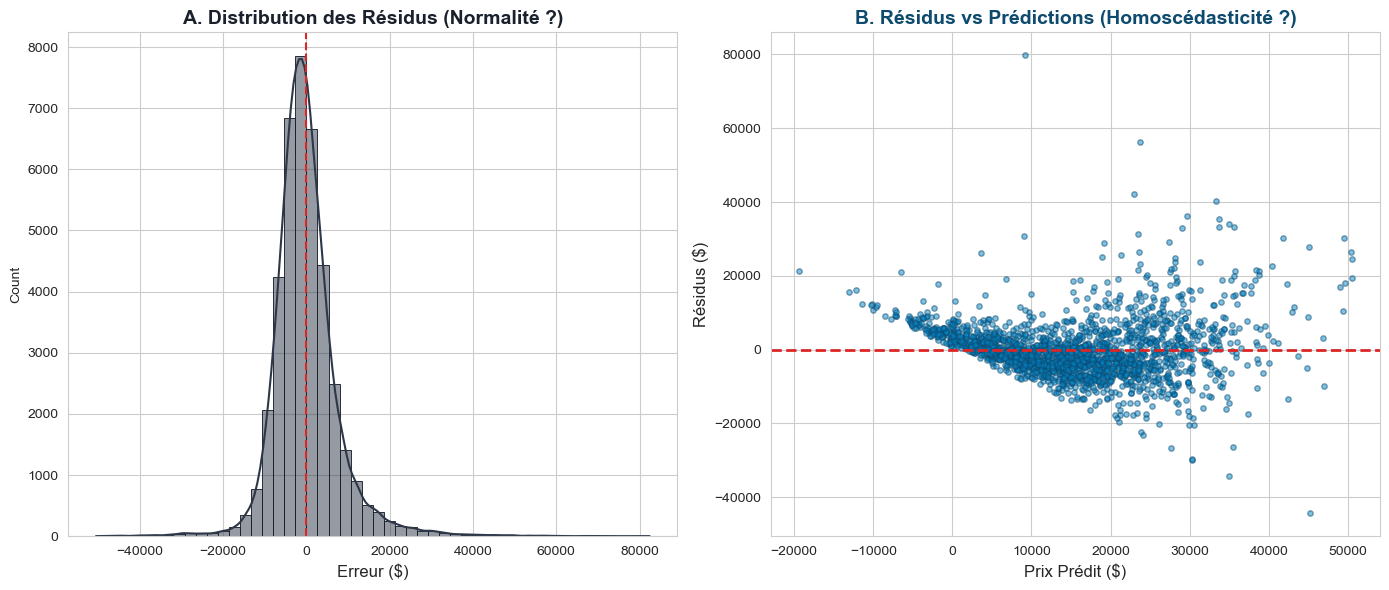

Graphiques d'évaluation sauvegardés.


In [63]:
# Calcul des résidus
residuals = y_test - y_pred_test

plt.figure(figsize=(14, 6))

# Plot 1 : Distribution des Résidus (Histogramme)
plt.subplot(1, 2, 1)
sns.histplot(residuals, bins=50, kde=True, color=colors_resid[1], edgecolor=colors_resid[0])
plt.axvline(x=0, color='#dc2626', linestyle='--')
plt.title("A. Distribution des Résidus (Normalité ?)", fontsize=14, fontweight='bold', color=colors_resid[0])
plt.xlabel("Erreur ($)", fontsize=12)

# Plot 2 : Résidus vs Prédictions (Homoscédasticité)
plt.subplot(1, 2, 2)
# Échantillon pour lisibilité
plt.scatter(y_pred_test[:2000], residuals[:2000], alpha=0.5, color=colors_pred[2], edgecolor=colors_pred[0], s=15)
plt.axhline(y=0, color='#dc2626', linestyle='--', linewidth=2)
plt.title("B. Résidus vs Prédictions (Homoscédasticité ?)", fontsize=14, fontweight='bold', color=colors_pred[0])
plt.xlabel("Prix Prédit ($)", fontsize=12)
plt.ylabel("Résidus ($)", fontsize=12)

plt.tight_layout()
plt.savefig("evaluation_finale_residus.png", dpi=300)
plt.show()

print("Graphiques d'évaluation sauvegardés.")

<div style="background-color: #075985;
            padding: 15px 25px;
            border-left: 6px solid #0ea5e9;
            border-radius: 8px;
            margin: 15px 0;">
    <h2 style="color: #fff3e0;
               margin: 0;
               font-size: 1.1em;;
               font-weight: bold;">
         Conclusion
    </h2>
</div>

En conclusion, nous avons mené à bien un projet complet de data science appliqué au marché des véhicules d'occasion. Après un nettoyage rigoureux des données, nous avons exploré visuellement les relations clés entre le prix, le kilométrage et l'âge des véhicules. Notre modèle de régression linéaire a mis en évidence plusieurs facteurs influençant le prix, avec une performance robuste sur les données de test. L'analyse des résidus suggère que notre modèle respecte les hypothèses statistiques fondamentales. Pour aller plus loin, nous pourrions explorer des modèles plus complexes ou intégrer des techniques de NLP pour exploiter les descriptions textuelles des annonces.

<div style="background: linear-gradient(135deg, #7c2d12 0%, #c2410c 50%, #fb923c 100%);
            padding: 20px;
            border-radius: 10px;
            box-shadow: 0 6px 15px rgba(124, 45, 18, 0.3);
            margin: 20px 0;">
    <h3 style="color: white;
               text-align: center;
               margin: 0;
               font-size: 1.5em;
               font-weight: bold;
               text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
        Merci pour votre attention !
    </h3>
</div>

In [64]:
import joblib


# Sauvegarde du modèle initial (déjà existant)
joblib.dump(model, 'linear_regression_model.pkl')  # 'model' est le LinearRegression de sklearn
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.pkl')

# Sauvegarde du modèle itératif (après élimination itérative des features non significatives)
# Assurez-vous que 'model_new' et 'selected_features' sont définis à partir de la fonction iterative_elimination
joblib.dump(model_new, 'iterative_model.pkl' , compress=9)  # 'model_new' est l'OLS de statsmodels
iterative_columns = list(selected_features)
joblib.dump(iterative_columns, 'iterative_model_columns.pkl')

# Sauvegarde du modèle robuste (avec covariance HC3)
# Assurez-vous que 'model_v3' et 'X_train_v3' (ou les features sélectionnées) sont définis
joblib.dump(model_v3, 'robust_model.pkl', compress = 9 )   # 'model_v3' est l'OLS robuste de statsmodels
robust_columns = list(X_train_v3.columns)  # Ou list(X_v3.columns) selon votre nommage
joblib.dump(robust_columns, 'robust_model_columns.pkl')


print("✅ Tous les modèles et colonnes sauvegardés avec succès !")
print("   - linear_regression_model.pkl & model_columns.pkl (Initial)")
print("   - iterative_model.pkl & iterative_model_columns.pkl (Itératif)")
print("   - robust_model.pkl & robust_model_columns.pkl (Robuste)")

✅ Tous les modèles et colonnes sauvegardés avec succès !
   - linear_regression_model.pkl & model_columns.pkl (Initial)
   - iterative_model.pkl & iterative_model_columns.pkl (Itératif)
   - robust_model.pkl & robust_model_columns.pkl (Robuste)
